In [1]:
import numpy as np
import pandas as pd
import jieba
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import Levenshtein
from wordcloud import WordCloud
%matplotlib inline
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False 

In [2]:
df_train = pd.read_csv('./train.csv')
df_dev = pd.read_csv('./dev.csv')
df_train.head(3)

,category,query1,query2,label
0,咳血,"剧烈运动后咯血,是怎么了?",剧烈运动后咯血是什么原因？,1.0
1,咳血,"剧烈运动后咯血,是怎么了?",剧烈运动后为什么会咯血？,1.0
2,咳血,"剧烈运动后咯血,是怎么了?",剧烈运动后咯血，应该怎么处理？,0.0


In [3]:
print('total number of question pairs in Train:{}'.format(len(df_train)))
print('positive tag:{}%'.format(round(df_train['label'].mean()*100, 2)))

print('total number of question pairs in Dev:{}'.format(len(df_dev)))
print('positive tag:{}%'.format(round(df_dev['label'].mean()*100, 2)))

total number of question pairs in Train:8753
positive tag:39.98%
total number of question pairs in Dev:2002
positive tag:40.16%


#concat the df_train df_dev

In [4]:
df_all = pd.concat([df_train, df_dev], axis=0, ignore_index=True)
print('total number of question pairs in Train&Dev:{}'.format(len(df_all)))
print('positive tag:{}%'.format(round(df_all['label'].mean()*100, 2)))
question_series = pd.Series(df_all['query1'].tolist() + df_all['query2'].tolist())
print("all question num:{}".format(len(question_series)))
print('unique question num:{}'.format(len(np.unique(question_series))))

total number of question pairs in Train&Dev:10755
positive tag:40.01%
all question num:21510
unique question num:11786


In [5]:
print('Catergory num question pairs:{}'.format(len(np.unique(df_all['category']))))
df_all['category'].value_counts()

Catergory num question pairs:8


感冒        2300
上呼吸道感染    2022
肺炎        1798
肺气肿       1175
哮喘        1105
胸膜炎       1020
支原体肺炎      955
咳血         380
Name: category, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

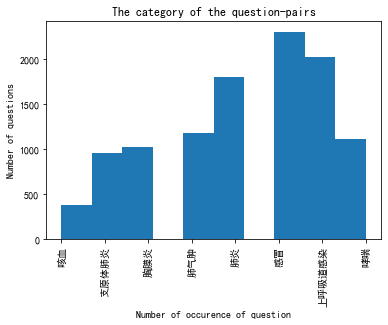

In [6]:
plt.hist(df_all['category'])
plt.title('The category of the question-pairs')
plt.xlabel('Number of occurence of question')
plt.ylabel('Number of questions')
plt.xticks(rotation='vertical')

#question apperance

Text(0, 0.5, 'Number of questions')

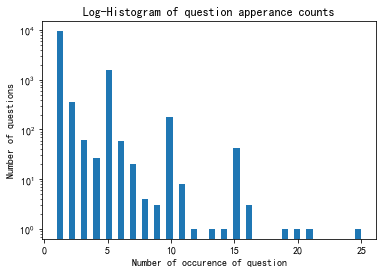

In [7]:
plt.hist(question_series.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question apperance counts')
plt.xlabel('Number of occurence of question')
plt.ylabel('Number of questions')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


mean train character length:13.69


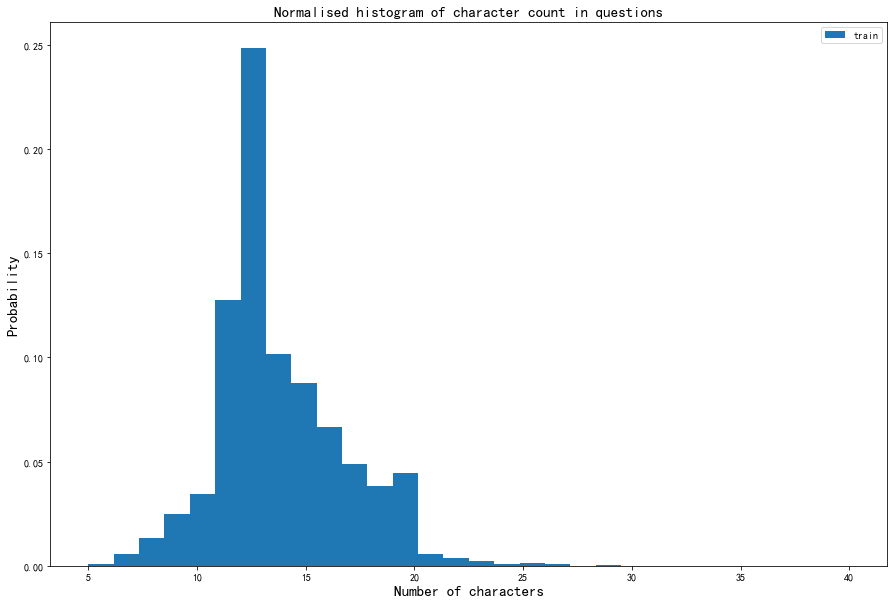

In [8]:
train_qs = question_series.astype(str)
dist_train = train_qs.apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=30, normed=True ,label='train')
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)
print('mean train character length:{:.2f}'.format(dist_train.mean()))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\47081\AppData\Local\Temp\jieba.cache
Loading model cost 0.812 seconds.
Prefix dict has been built succesfully.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


mean train word length:7.55


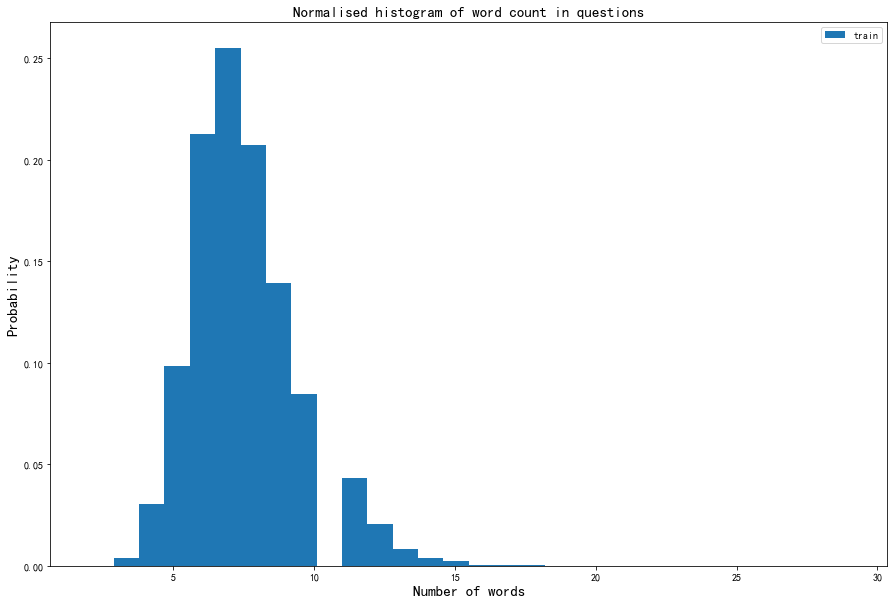

In [9]:
train_qs = question_series.apply(lambda x: ' '.join(jieba.cut(x)).split())
dist_train = train_qs.apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=30, normed=True ,label='train')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)
print('mean train word length:{:.2f}'.format(dist_train.mean()))

(-0.5, 1439.5, 1079.5, -0.5)

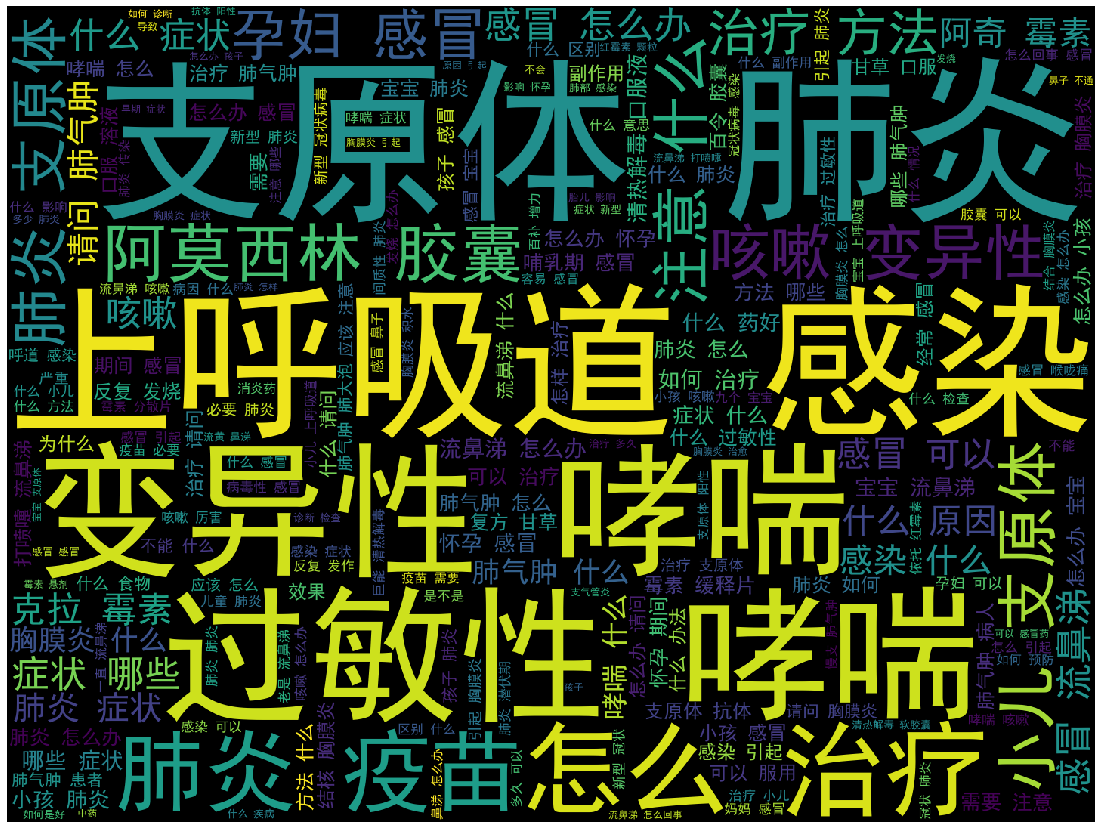

In [10]:
words = ' '.join(jieba.cut(" ".join(train_qs.astype(str))))
cloud = WordCloud(width=1440, height=1080, font_path='./SimHei.ttf').generate(words)
plt.figure(figsize=(29, 15))
plt.imshow(cloud)
plt.axis('off')

In [11]:
qmarks = np.mean(train_qs.apply(lambda x: '?' in x or '吗' in x or '怎么' in x or '如何' in x))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('obvious question:{:.2f}%'.format(qmarks*100))
#print('Question with [math] tags:{:.2f}'.format(math))
print('Question with numbers:{:.2f}%'.format(numbers*100))

obvious question:44.37%
Question with numbers:5.18%
